## Observations and Insights 

In [ ]:
# Obersvations from the data study:
# 1)  Count of Male mouse participated in the study is nore than Female.
# 2)  Drug Infubinol have Tumor volume data in the outliner.
# 3)  Correlation between average tumor volume vs. mouse weight for the Capomulin regimen is postive and regression is strong.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_1 = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = 'outer')

# Display the data table for preview
Combined_1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Unique_no_mouse = Combined_1["Mouse ID"].nunique()
Unique_no_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice_data =  Combined_1[Combined_1.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(Duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Combined_1 = Combined_1.set_index('Mouse ID')
Combined_2 = Combined_1.drop('g989')
Combined_2

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Combined_2 = Combined_2.reset_index()

Unique_no_mouse_1 = Combined_2["Mouse ID"].nunique()
Unique_no_mouse_1

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Drug_regimen_grp = Combined_2.groupby(['Drug Regimen'])

Mean_tumor_volume = Drug_regimen_grp["Tumor Volume (mm3)"].mean()
Median_tumor_volume = Drug_regimen_grp["Tumor Volume (mm3)"].median()
Var_tumor_volume = Drug_regimen_grp["Tumor Volume (mm3)"].var()
SD_tumor_volume = Drug_regimen_grp["Tumor Volume (mm3)"].std()
SEM_tumor_volume = Drug_regimen_grp["Tumor Volume (mm3)"].sem()

Drug_regimen_summary = pd.DataFrame({"Mean": Mean_tumor_volume,
                                    "Median": Median_tumor_volume,
                                    "Variance": Var_tumor_volume,
                                    "SD": SD_tumor_volume,
                                    "SEM": SEM_tumor_volume})
Drug_regimen_summary["Mean"] = Drug_regimen_summary["Mean"].map("{:,.2f}".format)
Drug_regimen_summary["Median"] = Drug_regimen_summary["Median"].map("{:,.2f}".format)
Drug_regimen_summary["Variance"] = Drug_regimen_summary["Variance"].map("{:,.2f}".format)
Drug_regimen_summary["SD"] = Drug_regimen_summary["SD"].map("{:,.2f}".format)
Drug_regimen_summary["SEM"] = Drug_regimen_summary["SEM"].map("{:,.2f}".format)
Drug_regimen_summary

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Drug_regimen_reg_summary = Drug_regimen_grp.aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})

Drug_regimen_reg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

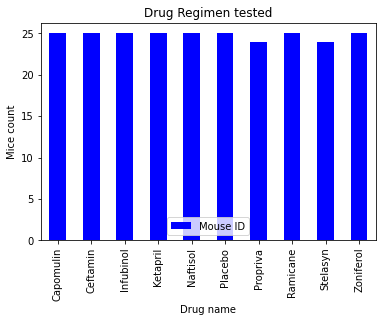

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

Total_mouse_count = pd.DataFrame(Drug_regimen_grp["Mouse ID"].nunique())

# Total_mouse_count
Total_mouse_count.plot(kind="bar", facecolor="blue")

plt.title("Drug Regimen tested")
plt.ylabel("Mice count")
plt.xlabel("Drug name")
plt.legend(loc="best")

plt.show()

([<matplotlib.axis.XTick at 0x2031640ca58>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

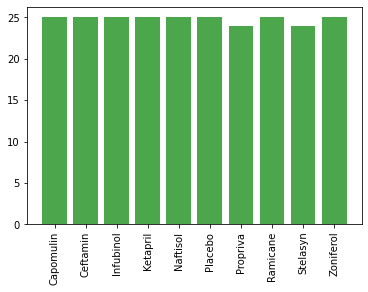

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Total_mouse_count = Total_mouse_count.reset_index()

x_axis = np.arange(len(Total_mouse_count))
tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,3))
plt.bar(x_axis,Total_mouse_count["Mouse ID"] , color='g', alpha=0.7, align="center")
plt.xticks(tick_locations, Total_mouse_count["Drug Regimen"], rotation="vertical")

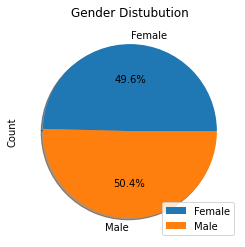

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_count = Combined_2.groupby(['Sex'])
Gender_count_1 = Gender_count['Mouse ID'].nunique()
                               
Gender_count_df = pd.DataFrame({"Count": Gender_count_1})
Gender_count_df.plot(kind="pie",subplots=True, autopct="%1.1f%%", shadow=True)
plt.title("Gender Distubution")
plt.legend(loc="lower right")

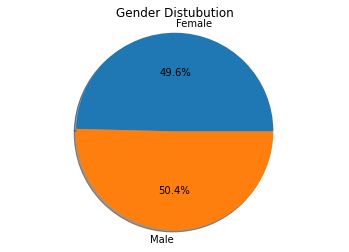

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_count_1 = Gender_count_1.reset_index()
Gender_count_1
plt.title("Gender Distubution")
plt.pie(Gender_count_1['Mouse ID'], labels=Gender_count_1['Sex'] ,autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Treatment_regimen = Combined_2.loc[(Combined_2['Drug Regimen'] == "Capomulin") |
                                   (Combined_2['Drug Regimen'] == "Ramicane")  |
                                   (Combined_2['Drug Regimen'] == "Infubinol") |
                                   (Combined_2['Drug Regimen'] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
Timepoint_count = Treatment_regimen.groupby(['Mouse ID', 'Drug Regimen'])
Timepoint_max = Timepoint_count["Timepoint"].max()

Timepoint_max= Timepoint_max.reset_index()
# Timepoint_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Timepoint_Merge = pd.merge(Timepoint_max, Combined_2, on=["Mouse ID" ,"Drug Regimen" ,"Timepoint"], how = 'inner')
Timepoint_Merge

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,Female,6,27,68.594745,4
96,y793,Capomulin,45,Male,17,17,31.896238,2
97,y865,Ceftamin,45,Male,23,26,64.729837,3
98,z578,Ramicane,45,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Treatment_list

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_list_Cap = []
Tumor_vol_list_Ram = []
Tumor_vol_list_Inf = []
Tumor_vol_list_Cef = []

for i in range(len(Timepoint_Merge)):
    Drug = Timepoint_Merge.iloc[i,:]["Drug Regimen"]
    Volume = Timepoint_Merge.iloc[i,:]["Tumor Volume (mm3)"]
    if Drug == 'Capomulin':
       Tumor_vol_list_Cap.append(Volume) 
    if Drug == 'Ramicane': 
       Tumor_vol_list_Ram.append(Volume)
    if Drug == 'Infubinol': 
       Tumor_vol_list_Inf.append(Volume)
    if Drug == 'Ceftamin':
       Tumor_vol_list_Cef.append(Volume)


In [15]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in Treatment_list:
    # From drug df , if drug name matches the one from list, add tumor volume to df
    drug_df = Timepoint_Merge.loc[Timepoint_Merge["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of {drug} occupancy is: {lowerq}")
    print(f"The upper quartile of {drug} occupancy is: {upperq}")
    print(f"The interquartile range of {drug} occupancy is: {iqr}")
    print(f"The the median of {drug} occupancy is: {quartiles[0.5]} ")
    print("-----------------------------------------------------------")
    
    # Determine outliers using upper and lower bounds
  
    print(f"Values below {drug} {lower_bound} could be outliers.")
    print(f"Values above {drug} {upper_bound} could be outliers.")
    print("-----------------------------------------------------------")

The lower quartile of Capomulin occupancy is: 32.37735684
The upper quartile of Capomulin occupancy is: 40.1592203
The interquartile range of Capomulin occupancy is: 7.781863460000004
The the median of Capomulin occupancy is: 38.125164399999996 
-----------------------------------------------------------
Values below Capomulin 20.70456164999999 could be outliers.
Values above Capomulin 51.83201549 could be outliers.
-----------------------------------------------------------
The lower quartile of Ramicane occupancy is: 31.56046955
The upper quartile of Ramicane occupancy is: 40.65900627
The interquartile range of Ramicane occupancy is: 9.098536719999998
The the median of Ramicane occupancy is: 36.56165229 
-----------------------------------------------------------
Values below Ramicane 17.912664470000003 could be outliers.
Values above Ramicane 54.30681135 could be outliers.
-----------------------------------------------------------
The lower quartile of Infubinol occupancy is: 54.04

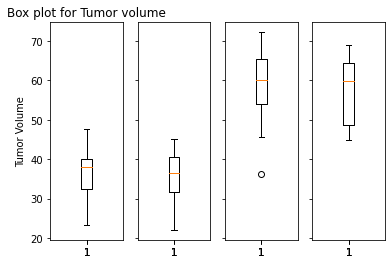

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,(ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, sharex='all', sharey='all')
ax1.set_title('Box plot for Tumor volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_vol_list_Cap)
ax2.boxplot(Tumor_vol_list_Ram)
ax3.boxplot(Tumor_vol_list_Inf)
ax4.boxplot(Tumor_vol_list_Cef)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

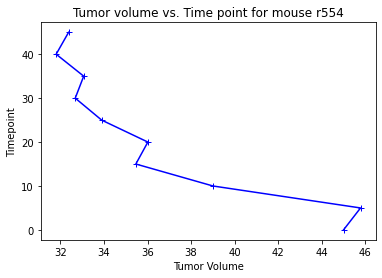

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = Combined_2.loc[(Combined_2['Drug Regimen'] == "Capomulin") &
                                (Combined_2['Mouse ID'] == "r554")]  
# Capomulin_data
x_axis = Capomulin_data['Tumor Volume (mm3)']
y_axis = Capomulin_data['Timepoint']
plt.plot(x_axis,y_axis, marker="+",color="blue", linewidth=1.5)
plt.title("Tumor volume vs. Time point for mouse r554")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")
plt.show

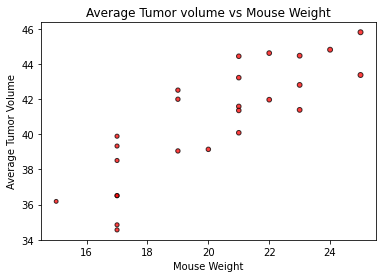

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data_avg = Combined_2.loc[(Combined_2['Drug Regimen'] == "Capomulin")]

Capomulin_data_comb = pd.DataFrame(Capomulin_data_avg.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())
Capomulin_data_comb = Capomulin_data_comb.reset_index()
# Capomulin_data_comb 
plt.scatter(Capomulin_data_comb['Weight (g)'], Capomulin_data_comb['Tumor Volume (mm3)'], marker="o", facecolors="red", 
            edgecolors="black", s=Capomulin_data_comb['Weight (g)'], alpha=0.75)

plt.title("Average Tumor volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coeff = st.pearsonr(Capomulin_data_comb['Tumor Volume (mm3)'], Capomulin_data_comb['Weight (g)'])
print(f"The correlation between both factors is {round(correlation_coeff[0],2)}") 

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


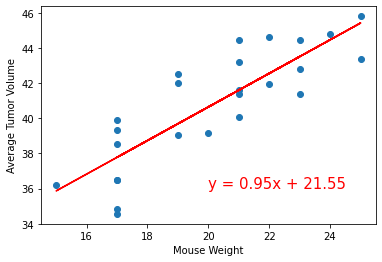

In [19]:
x_values = Capomulin_data_comb['Weight (g)']
y_values = Capomulin_data_comb['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()